# US House Price Prediction Assignment

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

The company wants to know:

    - Which variables are significant in predicting the price of a house, and

    - How well those variables describe the price of a house.


Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [3]:
# Load the Training Data

path = "C:\\Users\\MTripathi\\Desktop\\PGAIML\\Advanced Reression assignment\\train.csv"

house_df = pd.read_csv(path,encoding = "ISO-8859-1",low_memory=False)

house_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Understanding and Cleaning

In [4]:
house_df.shape

(1460, 81)

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#check missing values in dataset
missingval = round(100*house_df.isnull().sum()/len(house_df.index),2)
missingval.loc[missingval > 0].sort_values(ascending=False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

PoolQC, MiscFeature,Alley, Fence and FirePlaceQu have more than 80% of values NULL. Hence lets drop them

In [8]:
house_df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Treating Missing Values 

In [9]:
# Map all categorical attributes which are having "NA" to corresponding category as per data-dictionary
house_df.loc[house_df['FireplaceQu'].isnull(),'FireplaceQu'] = "no fireplace"
house_df.loc[house_df['GarageCond'].isnull(),'GarageCond'] = "no garage"
house_df.loc[house_df['GarageType'].isnull(),'GarageType'] = "no garage"
house_df.loc[house_df['GarageFinish'].isnull(),'GarageFinish'] = "no garage"
house_df.loc[house_df['GarageQual'].isnull(),'GarageQual'] = "no garage"
house_df.loc[house_df['BsmtExposure'].isnull(),'BsmtExposure'] = "no bsmt"
house_df.loc[house_df['BsmtFinType1'].isnull(),'BsmtFinType1'] = "no bsmt"
house_df.loc[house_df['BsmtFinType2'].isnull(),'BsmtFinType2'] = "no bsmt"
house_df.loc[house_df['BsmtCond'].isnull(),'BsmtCond'] = "no bsmt"
house_df.loc[house_df['BsmtQual'].isnull(),'BsmtQual'] = "no bsmt"
house_df.loc[house_df['MasVnrType'].isnull(),'MasVnrType'] = "none"


In [10]:
#check missing values in dataset
missingval = round(100*house_df.isnull().sum()/len(house_df.index),2)
missingval.loc[missingval > 0].sort_values(ascending=False)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

### Impute rest of the missing values

In [11]:
# LotFrontage is numeric variable. Hence we will impute missing value with mean as we have mean and median close 

house_df.loc[house_df.LotFrontage.isnull(),'LotFrontage'] = house_df.LotFrontage.mean()

In [12]:
# Check the value of GarageType for Null GarageYrBlt
house_df.loc[house_df.GarageYrBlt.isnull(),'GarageType'].value_counts()

no garage    81
Name: GarageType, dtype: int64

All datapoints where garage year blt is null is having no garage. Hence we can default all null garage year to current year to make age 0

In [13]:
# Impute missing Garage Year Built to Year Sold to make age of garage 0

import datetime as dt
house_df.loc[house_df.GarageYrBlt.isnull(),'GarageYrBlt'] = house_df.loc[house_df.GarageYrBlt.isnull(),'YrSold']



In [14]:
house_df.loc[house_df.MasVnrArea.isnull(),'MasVnrType'].value_counts()

none    8
Name: MasVnrType, dtype: int64

All missing Veneer area having null values are not having any veneer. Hence we will impute missing values with zero 

In [15]:
house_df.loc[house_df.MasVnrArea.isnull(),'MasVnrArea'] = 0

In [16]:
house_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [17]:
# Electrical is categorical attribute. Hence we will impute with mode which is SBrkr

house_df.loc[house_df.Electrical.isnull(),'Electrical'] = "SBrkr"


In [18]:
#check missing values in dataset
missingval = round(100*house_df.isnull().sum()/len(house_df.index),2)
missingval.loc[missingval > 0].sort_values(ascending=False)

Series([], dtype: float64)

Now we have treated all missing values in dataset

In [19]:
# Drop ID column as it is redundunt

house_df.drop(['Id'],axis=1,inplace=True)

In [20]:
# Drop Duplicates
house_df = house_df.drop_duplicates()

In [21]:
# Check all data types

house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [22]:
# Derive the House Age, GarageAge and Remodel Age


house_df['HouseAge'] = house_df.YrSold - house_df.YearBuilt
house_df['GarageAge'] = house_df.YrSold - house_df.GarageYrBlt
house_df['RemodelAge'] = house_df.YrSold - house_df.YearRemodAdd 


In [23]:
# Drop all years columns as we have converted them to age

house_df.drop(['YearBuilt','GarageYrBlt','YearRemodAdd','MoSold','YrSold'],axis=1,inplace=True)

In [24]:
# Convert all categorical variables represented in numeric form to object datatype as they nomial columns
house_df['MSSubClass'] = house_df['MSSubClass'].astype('object')

In [25]:
# Get all numeric columns df
house_numeric = house_df.select_dtypes(include=['int64','float64'])
house_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge,GarageAge,RemodelAge
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,61,0,0,0,0,0,208500,5,5.0,5
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,0,0,0,0,0,0,181500,31,31.0,31
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,42,0,0,0,0,0,223500,7,7.0,6
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,35,272,0,0,0,0,140000,91,8.0,36
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,84,0,0,0,0,0,250000,8,8.0,8


In [26]:
house_numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'HouseAge', 'GarageAge', 'RemodelAge'],
      dtype='object')

In [27]:
# Get all categorical columns in df
house_cat = house_df.select_dtypes(include=['object'])
house_cat.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,no fireplace,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [28]:
house_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

Now we have cleaned the data fully. Lets do EDA 

## Exploratory data Analysis

## Univariate Analyis

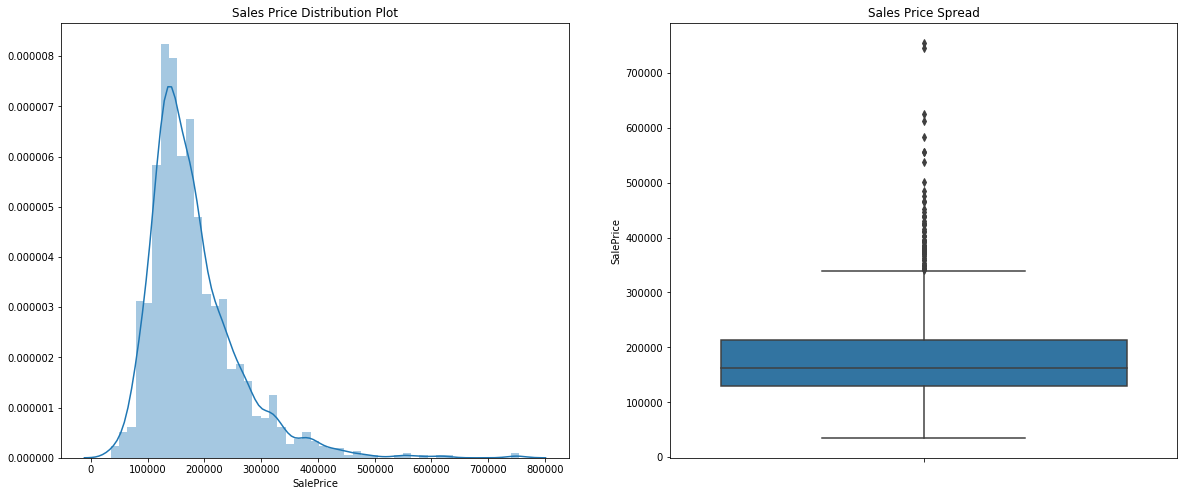

In [29]:
# Check the Target Variable "SalePrice" Distribution
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Sales Price Distribution Plot')
sns.distplot(house_df.SalePrice)

plt.subplot(1,2,2)
plt.title('Sales Price Spread')
sns.boxplot(y=house_df.SalePrice)

#### Insights 
       - Price Frequency plot is right skewed which shows most of sales is priced between $100000 and $200000
       - There is a significant difference between the mean and the median of the price distribution.

Lets make target variable normally distributed by transforming it

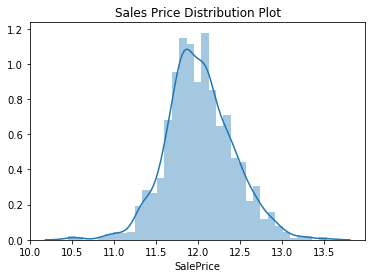

In [30]:
plt.title('Sales Price Distribution Plot')
sns.distplot(np.log(house_df.SalePrice))

Now we see Price is normally distributed. So we are good. Lets tranform SalePrice to log of SalePrice

In [31]:
house_df['SalePrice'] = np.log(house_df.SalePrice)
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,HouseAge,GarageAge,RemodelAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,WD,Normal,12.247694,5,5.0,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,WD,Normal,12.109011,31,31.0,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,WD,Normal,12.317167,7,7.0,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,WD,Abnorml,11.849398,91,8.0,36
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,WD,Normal,12.429216,8,8.0,8


In [32]:
house_numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'HouseAge', 'GarageAge', 'RemodelAge'],
      dtype='object')

In [73]:

#lets plot distplot for all the numeric columns to observe there distribution 
# for col in house_numeric.columns:
#     plt.figure(figsize=(12,8))
#     sns.distplot(house_df[col])

#### Insights
    - LotFrontage , Lot Area , GrLivArea and Total Square Feet are normally distributed and skewed in right.

In [74]:
# for col in house_cat.columns:
#     plt.figure(figsize=(12,8))
#     sns.countplot(col, data = house_df)
#     plt.xticks(rotation = 90)

In [75]:
# for col in house_cat.columns:
#     plt.figure(figsize=(12,8))
#     sns.boxplot(x = col, y = 'SalePrice', data = house_df)
#     plt.xticks(rotation = 90)



Below are the some of categorical features which increases SalePrice

 - MS Zoning Residential Low Density and Floating Village Residential 
 - RoofMatl - Wood Shingles
 - Neighborhood - Northridge Heights and Stone Brook
 - Condition1  - Adjacent to North-South Railroad
 - exterQual , BsmtQual and KitchenQual excellent
 - Heating - Gas forced warm air furnace Gas hot water or steam heat


## Bivariate Analysis

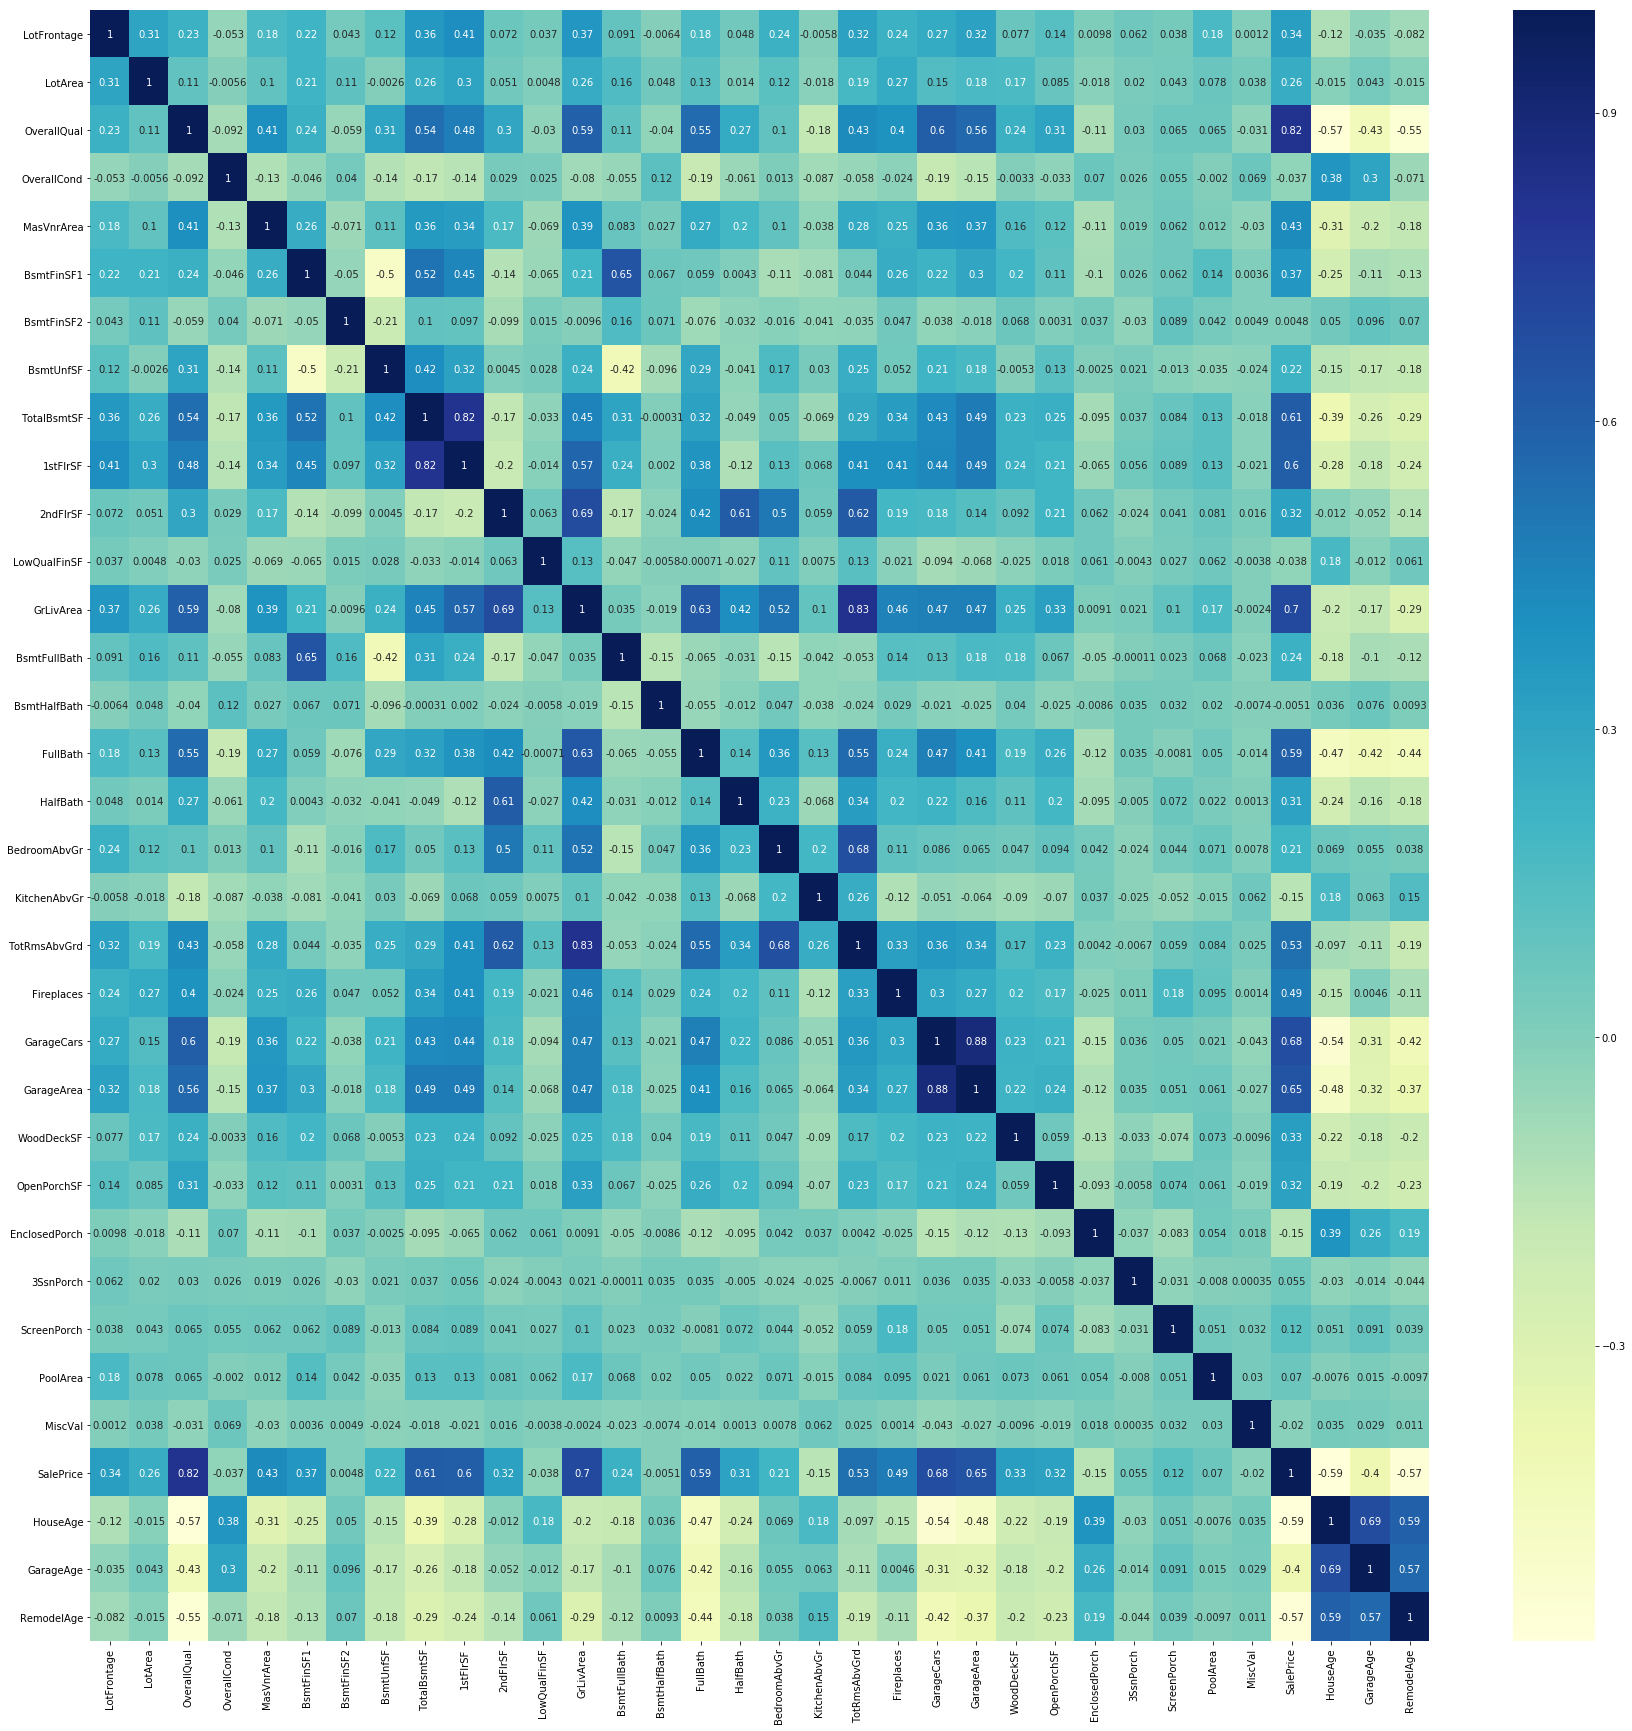

In [36]:
# correlation matrix
fig =plt.figure(figsize=(30,30))
sns.heatmap(house_df.corr(), cmap="YlGnBu", annot = True)

<Figure size 2880x2160 with 0 Axes>

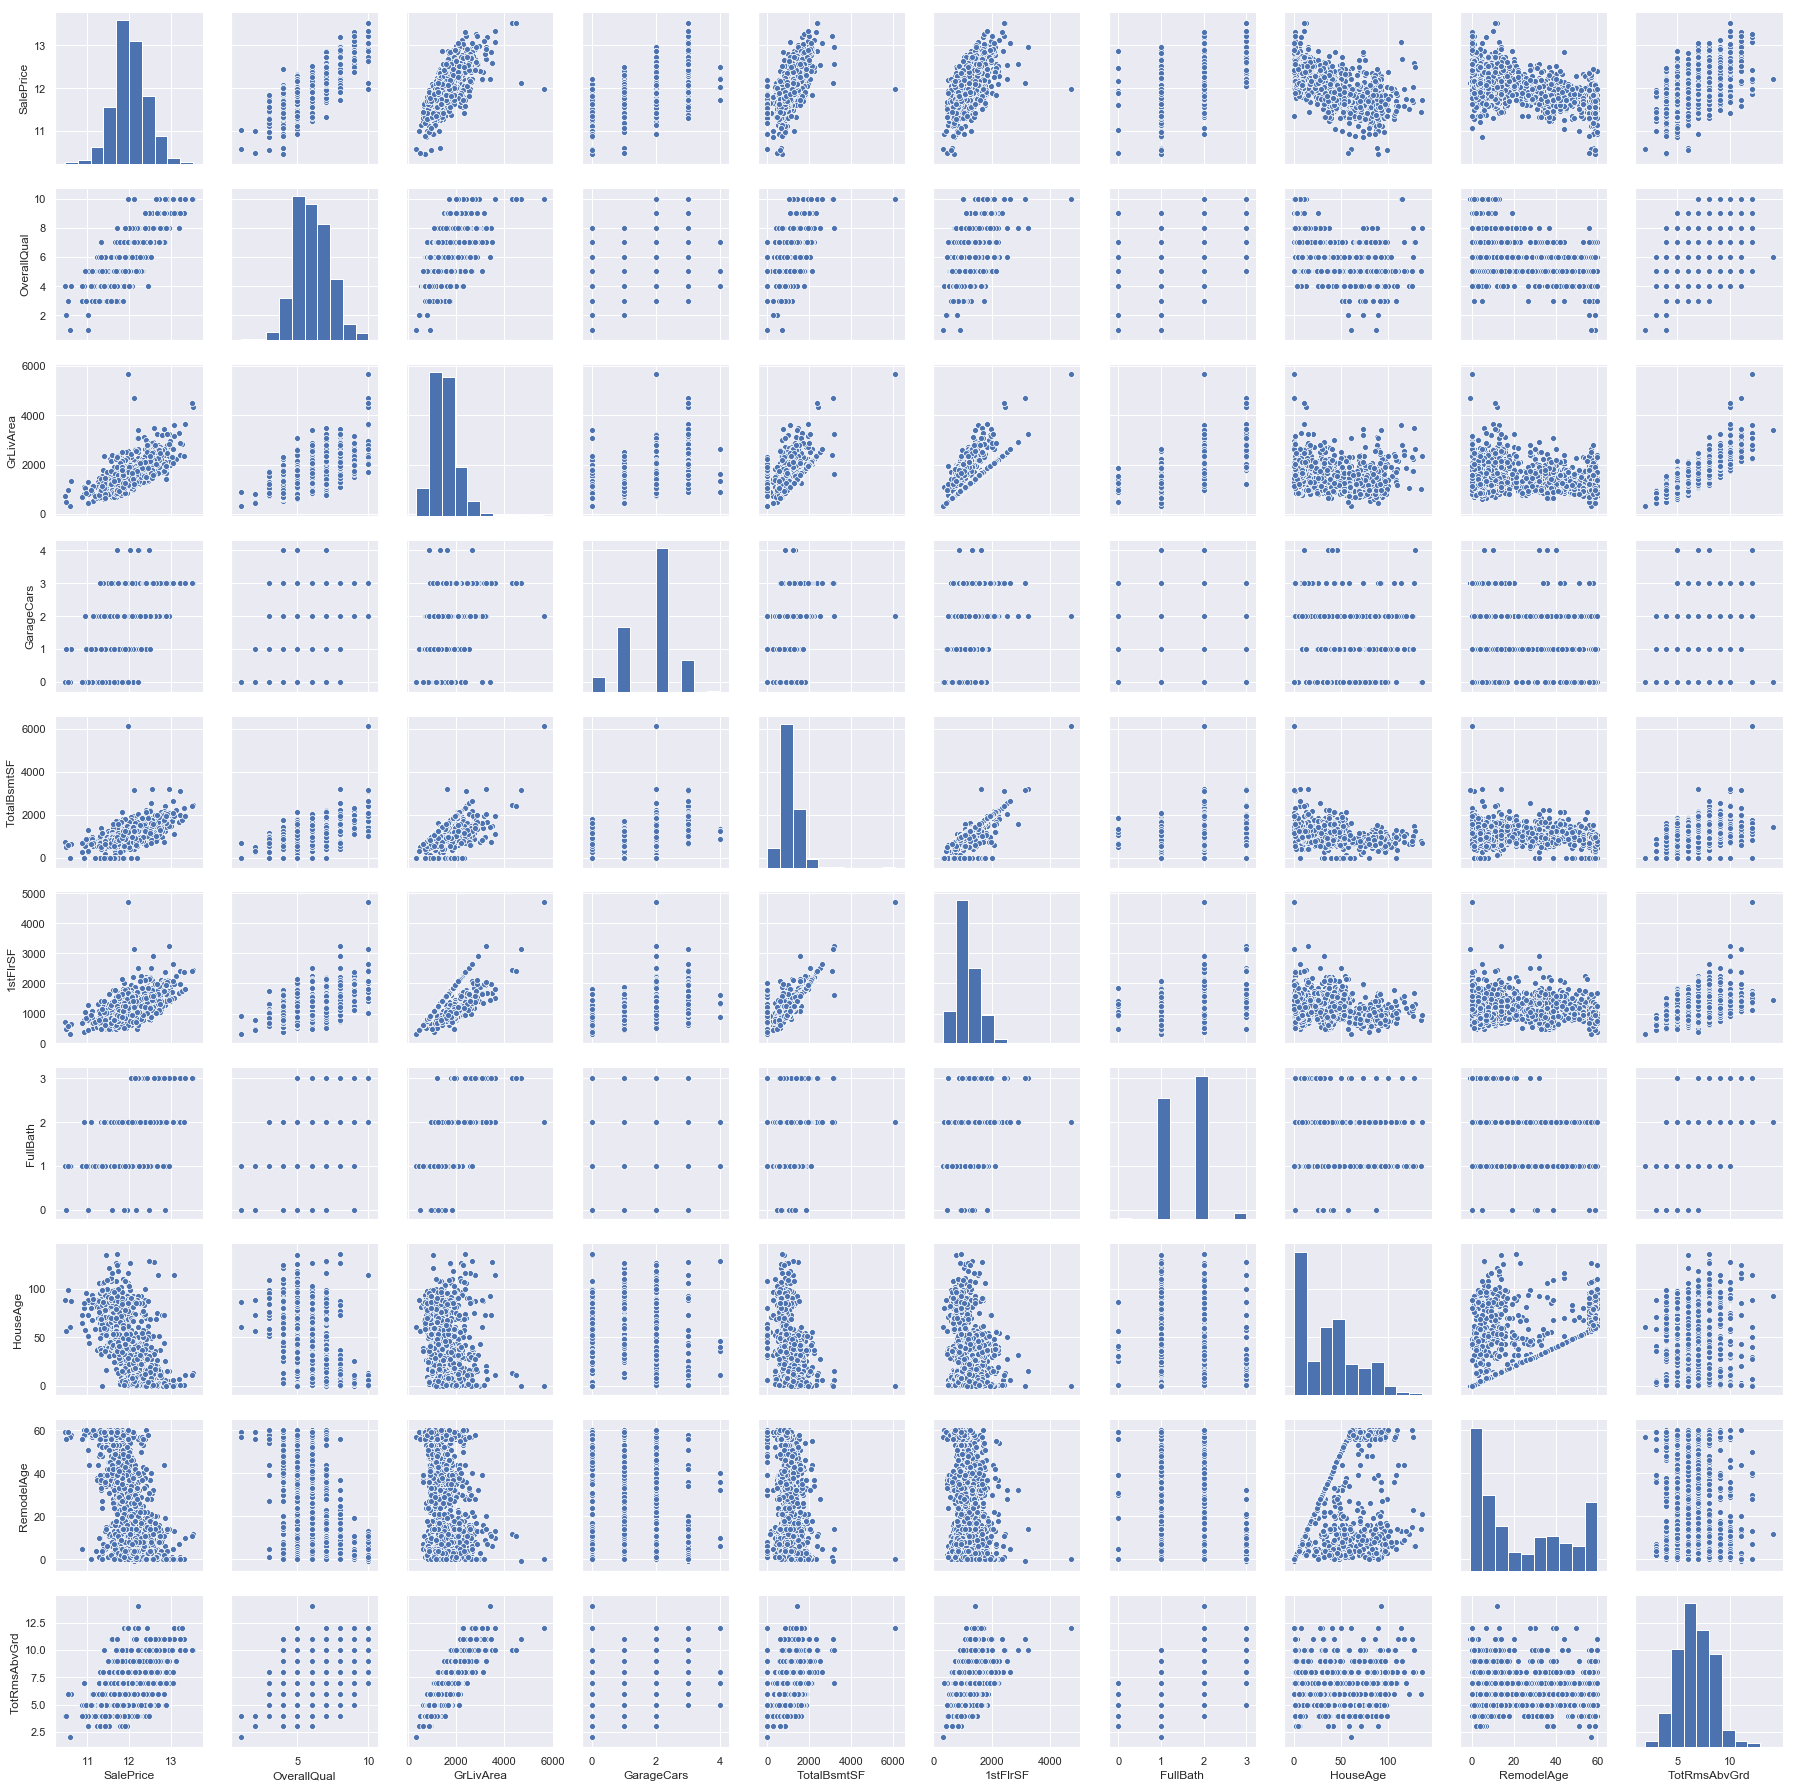

In [37]:
# Pair Plot for variables having high correlation with SalePrice as we have many attributes
sns.set()
plt.figure(figsize=(40, 30))
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF','1stFlrSF', 'FullBath', 'HouseAge','RemodelAge',
        'TotRmsAbvGrd']
sns.pairplot(house_df[cols], size = 2.5)

#### Insights

 - High positive correlation of SalesPrice with OverallQual,GrLivArea
 - Negative correlation of Sale Price with HouseAge, Garage Age
 - GrLivArea is highly correlated with TotalRmsAbvGrd
 - 1stFlrSF is highly positive correlated with TotalBsmtSF
 - GarageCars is highly positive correlated with GarageArea

Clearly there is multicollinearity among these variables
 

### Outliers Treatment

Lets check the outliers using box plot for columns having skewed distribution

In [76]:
# Outlier_col =['LotArea','LotFrontage','MasVnrArea','GrLivArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF']
# for col in Outlier_col:
#     plt.figure(figsize=(12,8))
#     sns.boxplot(house_df[col])


We that LotArea, LotFrontage,MasVnrArea and GrLiveArea are having high number of outliers. But we will not treat it as we will losing large portion of data which will be crucial for our analysis

## Convert Categorical columns into numeric

Below columns are of ordered category. Hence convert them to numeric manually

ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageQual,GarageCond

In [39]:
house_df['ExterQual'] = house_df.ExterQual.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['ExterCond'] = house_df.ExterCond.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['BsmtQual'] = house_df.BsmtQual.map({'no bsmt':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['BsmtCond'] = house_df.BsmtCond.map({'no bsmt':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['BsmtExposure'] = house_df.BsmtExposure.map({'no bsmt':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_df['BsmtFinType1'] = house_df.BsmtFinType1.map({'no bsmt':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_df['BsmtFinType2'] = house_df.BsmtFinType2.map({'no bsmt':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_df['HeatingQC'] = house_df.HeatingQC.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['KitchenQual'] = house_df.KitchenQual.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['GarageQual'] = house_df.GarageQual.map({'no garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['GarageCond'] = house_df.GarageCond.map({'no garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['FireplaceQu'] = house_df.FireplaceQu.map({'no fireplace':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [40]:
house_numeric = house_df.select_dtypes(['int64','float64'])
house_numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'HouseAge',
       'GarageAge', 'RemodelAge'],
      dtype='object')

In [41]:
#Binary encoding
house_df['CentralAir']= house_df.CentralAir.map({'Y':1,'N':0})

In [42]:
house_cat = house_df.select_dtypes(['object'])
house_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [43]:
house_dummies = pd.get_dummies(house_df[house_cat.columns],drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [44]:
# drop original categorial columns after creating dummies

house_df.drop(house_cat.columns,axis=1,inplace=True)
house_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge,GarageAge,RemodelAge
0,65.0,8450,7,5,196.0,4,3,4,3,1,...,61,0,0,0,0,0,12.247694,5,5.0,5
1,80.0,9600,6,8,0.0,3,3,4,3,4,...,0,0,0,0,0,0,12.109011,31,31.0,31
2,68.0,11250,7,5,162.0,4,3,4,3,2,...,42,0,0,0,0,0,12.317167,7,7.0,6
3,60.0,9550,7,5,0.0,3,3,3,4,1,...,35,272,0,0,0,0,11.849398,91,8.0,36
4,84.0,14260,8,5,350.0,4,3,4,3,3,...,84,0,0,0,0,0,12.429216,8,8.0,8


In [45]:
# combine dummies df with house df 
housedf = pd.concat([house_df,house_dummies],axis=1)
housedf.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,4,3,4,3,1,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,0.0,3,3,4,3,4,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,162.0,4,3,4,3,2,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,0.0,3,3,3,4,1,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,350.0,4,3,4,3,3,...,0,0,0,0,1,0,0,0,1,0


In [46]:
housedf.shape

(1460, 218)

In [47]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 218 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(4), int64(43), uint8(171)
memory usage: 831.3 KB


##  Splitting the Data into Training and Testing Sets

In [48]:
# Split cars dataframe to test and train dfs
from sklearn.preprocessing import StandardScaler

y = housedf.loc[:, 'SalePrice']
X = housedf.loc[:, housedf.columns != 'SalePrice']

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

### Building First Model using Linear Regression with all features

#### Scaling of Features

In [49]:
### Rescaling the Features using StandardScaler. Scale only numeric columns. Dummies will not be scaled 

scaler = StandardScaler()

scale_col = housedf.columns.drop(['SalePrice'])

X_train[scale_col]=scaler.fit_transform(X_train[scale_col])
X_test[scale_col] = scaler.transform(X_test[scale_col])

In [50]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
921,-0.141448,-0.178830,-0.828481,1.263326,-0.587843,-0.724563,-0.26333,-0.570493,0.112822,-0.609160,...,-0.058621,-0.050746,-0.302636,-0.041416,0.392620,-0.041416,-0.092928,-0.121531,0.469554,-0.305995
520,-0.452628,0.026099,-1.558795,1.263326,-0.587843,-0.724563,-0.26333,-4.011124,-5.302645,-1.536799,...,-0.058621,-0.050746,-0.302636,-0.041416,0.392620,-0.041416,-0.092928,-0.121531,0.469554,-0.305995
401,-0.230357,-0.179843,0.632147,-0.537241,-0.587843,1.020364,-0.26333,0.576384,0.112822,1.246118,...,-0.058621,-0.050746,3.304295,-0.041416,-2.546994,-0.041416,-0.092928,-0.121531,-2.129682,3.268027
280,0.525365,0.075432,0.632147,0.363042,1.326545,1.020364,-0.26333,0.576384,0.112822,1.246118,...,-0.058621,-0.050746,-0.302636,-0.041416,0.392620,-0.041416,-0.092928,-0.121531,0.469554,-0.305995
1401,-0.363719,-0.316800,-0.098167,-0.537241,-0.587843,-0.724563,-0.26333,-0.570493,0.112822,-0.609160,...,-0.058621,-0.050746,-0.302636,-0.041416,0.392620,-0.041416,-0.092928,-0.121531,0.469554,-0.305995


In [51]:
# let's build a Linear regression model first
from sklearn import metrics
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.944771393663721

In [52]:

y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-1.0096349954142388e+21

Test Accuracy is very low, which show clearly the case of overfitting. Lets use RFE for feature elimination first

### RFE for Feature Elimination

We have total 218 columns. Lets select top 60 columns using RFE. These selected columns will be passed to Lasso and Ridge Regression for Model Building

In [53]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 120 features
lm = LinearRegression()
rfe = RFE(lm, 60)

# Fit with 120 features
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=60, step=1, verbose=0)

In [54]:
# Check ranking of the columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 33),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 64),
 ('ExterQual', False, 85),
 ('ExterCond', False, 98),
 ('BsmtQual', False, 67),
 ('BsmtCond', False, 157),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 58),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 117),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', True, 1),
 ('CentralAir', False, 15),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 19),
 ('BsmtHalfBath', False, 106),
 ('FullBath', False, 26),
 ('HalfBath', False, 7),
 ('BedroomAbvGr', False, 86),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', False, 20),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('FireplaceQu', False, 118),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('GarageQual', True, 1),
 ('GarageCond', True, 1),
 ('WoodDeckSF', True, 1),

In [55]:
rfecol = X_train.columns[rfe.support_]
rfecol

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'ScreenPorch', 'HouseAge', 'RemodelAge', 'MSSubClass_30',
       'MSSubClass_90', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition2_PosN', 'Condition2_RRAe',
       'BldgType_Duplex', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd'

In [56]:
X_train_rfe= X_train[rfecol]
X_test_rfe = X_test[rfecol]

Now retest Linear Regression Model after eliminating features using RFE

In [57]:
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)

# predict
y_train_pred = lm.predict(X_train_rfe)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9288969436700358

In [58]:
y_test_pred = lm.predict(X_test_rfe)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-3.311538801468252e+20

Test accuracy is still very low as we have pretty high number of columns for RFE.

Lets use Lasso to eliminate rest of the features and build the model

## Lasso Regression

In [59]:
#Importing the lasso and ridge regressions
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [60]:
# lasso regression without tuning hyper parameter
lm = Lasso(alpha=0.001)
lm.fit(X_train_rfe, y_train)

# predict
y_train_pred = lm.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9253009754936674
0.7966659806821589


We have high difference in Train and test accuracy. We need to optimize alpha value to find optimal model

Now Lets tune hyper parameter to get better accuracy using KFOLD Cross Validation

In [61]:
# Now let's do k fold with r2 score and tune hyper parameter
from sklearn.model_selection import KFold

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.00020, 0.00030, 0.0004,0.00050,0.00060,0.00070, 0.00080,0.0009,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]}

model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    2.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [62]:
# results data frame 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.070012,0.009279,0.002593,7.977488e-04,0.0001,{'alpha': 0.0001},0.697587,0.611905,0.764868,0.868780,...,0.755860,0.093300,19,0.932009,0.932252,0.920926,0.934770,0.936086,0.931209,0.005365
1,0.051661,0.005760,0.001995,6.309774e-04,0.0002,{'alpha': 0.0002},0.698146,0.623780,0.772208,0.869192,...,0.759898,0.089855,18,0.931940,0.932136,0.920807,0.934627,0.935956,0.931093,0.005362
2,0.040092,0.005863,0.001795,7.465064e-04,0.0003,{'alpha': 0.0003},0.698593,0.635575,0.779562,0.869483,...,0.763905,0.086572,17,0.931823,0.931960,0.920614,0.934391,0.935796,0.930917,0.005366
3,0.029025,0.004969,0.002594,1.738981e-03,0.0004,{'alpha': 0.0004},0.698955,0.646701,0.787048,0.869650,...,0.767759,0.083614,16,0.931661,0.931736,0.920354,0.934063,0.935583,0.930679,0.005370
4,0.026928,0.003989,0.001995,4.523674e-07,0.0005,{'alpha': 0.0005},0.699162,0.657395,0.794269,0.869746,...,0.771422,0.080922,15,0.931492,0.931460,0.920064,0.933666,0.935309,0.930398,0.005365


In [63]:
model_cv.best_params_

{'alpha': 0.005}

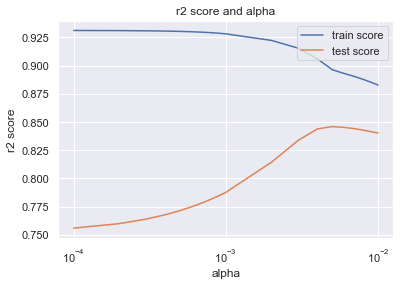

In [64]:
#plotting the values of r2 score to choose the optimal value of alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [65]:
# model with optimal alpha = 0.0009
lm = Lasso(alpha=.005)
lm.fit(X_train_rfe, y_train)


# predict
y_train_pred = lm.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8906498454123025
0.8950709790921774


Now we see with tuned hyper parameter , accuracy has increased giving better model

In [66]:
# Now let's do k fold with neg_mean_squared_error score and tune hyper parameter

params = {'alpha': [0.0001, 0.00020, 0.00030, 0.0004,0.00050,0.00060,0.00070, 0.00080,0.0009,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]}


model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    2.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=1)

In [67]:
# results data frame 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.058547,0.023400,0.001994,0.000893,0.0001,{'alpha': 0.0001},-0.047861,-0.053634,-0.040593,-0.024146,...,-0.037187,0.013235,19,-0.010514,-0.010825,-0.011876,-0.009666,-0.010499,-0.010676,0.000713
1,0.038997,0.001958,0.001596,0.000488,0.0002,{'alpha': 0.0002},-0.047773,-0.051993,-0.039325,-0.024070,...,-0.036573,0.012771,18,-0.010524,-0.010844,-0.011894,-0.009688,-0.010520,-0.010694,0.000712
2,0.036843,0.005588,0.001397,0.000489,0.0003,{'alpha': 0.0003},-0.047702,-0.050363,-0.038056,-0.024017,...,-0.035964,0.012336,17,-0.010542,-0.010872,-0.011923,-0.009723,-0.010546,-0.010721,0.000711
3,0.026408,0.003655,0.001596,0.000489,0.0004,{'alpha': 0.0004},-0.047645,-0.048826,-0.036764,-0.023986,...,-0.035377,0.011943,16,-0.010567,-0.010908,-0.011962,-0.009771,-0.010581,-0.010758,0.000709
4,0.017654,0.002595,0.001198,0.000399,0.0005,{'alpha': 0.0005},-0.047612,-0.047348,-0.035517,-0.023969,...,-0.034820,0.011592,15,-0.010593,-0.010952,-0.012006,-0.009830,-0.010626,-0.010802,0.000706


In [68]:
model_cv.best_params_

{'alpha': 0.005}

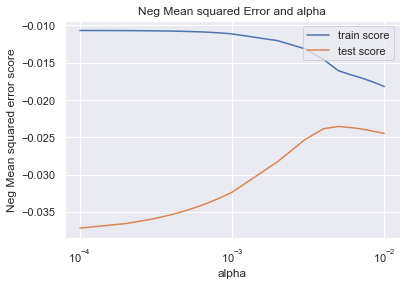

In [69]:
#plotting the values of r2 score to choose the optimal value of alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Neg Mean squared error score')
plt.title("Neg Mean squared Error and alpha")
plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

K-Fold with neg_mean_squared_error is giving best alpha as 0.005. Hence lets build the model using alpha = 0.005 

In [70]:
lm = Lasso(alpha=.005)
lm.fit(X_train_rfe, y_train)


# predict
y_train_pred = lm.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8906498454123025
0.8950709790921774


In [71]:
# lasso model parameters with alpha = .005
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_test_rfe.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
final_var=dict(zip(cols, model_parameters))
{k: v for k, v in sorted(final_var.items(), key=lambda item: item[1])}

{'HouseAge': -0.05,
 'RemodelAge': -0.026,
 'Condition2_PosN': -0.022,
 'MSSubClass_160': -0.017,
 'MSSubClass_30': -0.014,
 'KitchenAbvGr': -0.011,
 'Exterior1st_BrkComm': -0.011,
 'MSZoning_RM': -0.008,
 'Neighborhood_MeadowV': -0.005,
 'Functional_Sev': -0.003,
 'BsmtUnfSF': -0.0,
 '2ndFlrSF': 0.0,
 'LowQualFinSF': -0.0,
 'GarageCond': 0.0,
 'MSSubClass_90': -0.0,
 'MSZoning_RH': 0.0,
 'LandSlope_Sev': -0.0,
 'Condition2_RRAe': -0.0,
 'BldgType_Duplex': -0.0,
 'RoofStyle_Shed': -0.0,
 'RoofMatl_Metal': 0.0,
 'RoofMatl_Roll': 0.0,
 'RoofMatl_WdShake': 0.0,
 'Exterior1st_AsphShn': 0.0,
 'Exterior1st_CBlock': -0.0,
 'Exterior1st_CemntBd': 0.0,
 'Exterior2nd_CBlock': -0.0,
 'RoofMatl_Membran': 0.001,
 'RoofMatl_Tar&Grv': 0.001,
 'Exterior2nd_CmentBd': 0.001,
 'GarageArea': 0.002,
 'BsmtFinSF2': 0.004,
 'RoofMatl_CompShg': 0.005,
 'GarageQual': 0.007,
 'RoofMatl_WdShngl': 0.007,
 'Foundation_PConc': 0.01,
 'Functional_Typ': 0.01,
 '1stFlrSF': 0.011,
 'SaleCondition_Normal': 0.011,
 'Scre

With optimal value of alpha = 0.005 we have train score = 0.89 and Test Score = .895. This show Model is not overfit and underfit as well.

Hence this Lasso Model is optimal Model for SalePrice Prediction.

Below are Top feature in the model which positively Impact SalePrice

   - GrLivArea
   - OverallQual
   - GarageCars
   - OverallCond
   - MSZoning_RL

Below are top features which negatively Impact SalePrice

  - HouseAge'
  - 'Condition2_PosN'
  - 'RemodelAge'
  - 'MSSubClass_160'
  - 'MSSubClass_30'
  


In [72]:
Lasso_feat = []
for k,v in final_var.items():
    if (v !=0):
        Lasso_feat.append(k)
Lasso_feat

['constant',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 'GrLivArea',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'WoodDeckSF',
 'ScreenPorch',
 'HouseAge',
 'RemodelAge',
 'MSSubClass_30',
 'MSSubClass_160',
 'MSZoning_FV',
 'MSZoning_RL',
 'MSZoning_RM',
 'Neighborhood_Crawfor',
 'Neighborhood_MeadowV',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition2_PosN',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior2nd_CmentBd',
 'Foundation_PConc',
 'Functional_Sev',
 'Functional_Typ',
 'SaleType_New',
 'SaleCondition_Normal']

In [1159]:
Lasso_feat.remove('constant')

In [1160]:
len(Lasso_feat)

43


 Total of 43 features selected for the Model. Rest of the features were elimiated by Lasso Model

### Ridge Regression

In [1161]:
# ridge regression without tuning hyper parameter
lm = Ridge(alpha=0.001)
lm.fit(X_train_rfe, y_train)

# predict
y_train_pred = lm.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9288970314701145
0.7126452265311363


We see huge difference between Test and train r2 scores. Hence we need to tune alpha for optimal model selection

In [1162]:
# Now let's do k fold with r2 score and tune hyper parameter
params = {'alpha': [25.0, 30.0, 40.0,50.0,60.0,70.0,80.0,90.0,100.0,200.0,250,280,300.0,310,320,330,340,350,500.0,800.0,1000]}


ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:   18.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [25.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 200.0, 250, 280, 300.0, 310, 320, 330, 340, 350, 500.0, 800.0, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [1163]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.131044,0.066278,0.102720,0.080540,25,{'alpha': 25.0},0.671439,0.909051,0.816105,0.871886,...,0.841072,0.094112,21,0.940205,0.916836,0.920371,0.914788,0.911256,0.920691,0.010194
1,0.141813,0.048968,0.062430,0.027439,30,{'alpha': 30.0},0.673720,0.907886,0.827563,0.878567,...,0.844796,0.092929,20,0.940038,0.914757,0.917987,0.912791,0.909058,0.918926,0.010945
2,0.195467,0.085773,0.090553,0.045976,40,{'alpha': 40.0},0.678130,0.906013,0.842742,0.886880,...,0.849774,0.091056,18,0.939698,0.911353,0.914059,0.909497,0.905455,0.916012,0.012169
3,0.133835,0.045139,0.054453,0.017936,50,{'alpha': 50.0},0.682273,0.904577,0.852141,0.891590,...,0.852945,0.089442,17,0.939347,0.908689,0.910968,0.906899,0.902635,0.913708,0.013107
4,0.074000,0.031897,0.032512,0.009133,60,{'alpha': 60.0},0.686132,0.903436,0.858412,0.894460,...,0.855153,0.087952,15,0.938982,0.906542,0.908466,0.904789,0.900363,0.911829,0.013839


In [1164]:
model_cv.best_params_

{'alpha': 280}

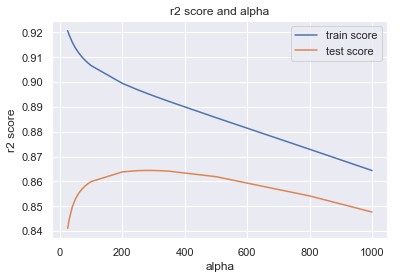

In [1165]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1166]:
# Now let's do k fold with neg_mean_squared_error score and tune hyper parameter
params = {'alpha': [25.0, 30.0, 40.0,50.0,60.0,70.0,80.0,90.0,100.0,200.0,250,280,300.0,310,320,330,340,350,500.0,800.0,1000]}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    4.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [25.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 200.0, 250, 280, 300.0, 310, 320, 330, 340, 350, 500.0, 800.0, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=1)

In [1167]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.039492,0.035816,0.016555,0.007611,25,{'alpha': 25.0},-0.060789,-0.012886,-0.029662,-0.018465,...,-0.026191,0.018661,21,-0.008853,-0.013216,-0.012263,-0.013483,-0.014030,-0.012369,0.001849
1,0.038495,0.012966,0.016356,0.008978,30,{'alpha': 30.0},-0.060367,-0.013051,-0.027814,-0.017502,...,-0.025595,0.018489,20,-0.008878,-0.013546,-0.012630,-0.013799,-0.014377,-0.012646,0.001967
2,0.022338,0.006927,0.017752,0.008258,40,{'alpha': 40.0},-0.059551,-0.013316,-0.025366,-0.016304,...,-0.024789,0.018186,19,-0.008928,-0.014087,-0.013235,-0.014320,-0.014947,-0.013103,0.002159
3,0.042086,0.033396,0.013562,0.006102,50,{'alpha': 50.0},-0.058784,-0.013520,-0.023850,-0.015625,...,-0.024265,0.017905,17,-0.008980,-0.014510,-0.013711,-0.014731,-0.015393,-0.013465,0.002306
4,0.045675,0.024795,0.028921,0.027974,60,{'alpha': 60.0},-0.058070,-0.013681,-0.022838,-0.015211,...,-0.023893,0.017639,16,-0.009034,-0.014851,-0.014096,-0.015065,-0.015752,-0.013760,0.002421


In [1168]:
model_cv.best_params_

{'alpha': 320}

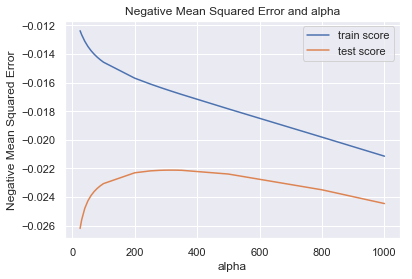

In [1169]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title("Negative Mean Squared Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

With optimal val of alpha = 320 , lets check the model accuracy

In [1170]:
# model with optimal alpha = 320
# ridge regression
lm = Ridge(alpha=320)
lm.fit(X_train_rfe, y_train)
y_train_pred = lm.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8919920997912584
0.8840387520905781


With optimal alpha value = 320 , we are getting Train r2 score = 0.89 and Test r2 score = 0.88. This is optimal Model with no overfitting and underfitting 

In [1171]:
# Ridge model with alpha value = 340
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_test_rfe.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
final_var=dict(zip(cols, model_parameters))
{k: v for k, v in sorted(final_var.items(), key=lambda item: item[1])}

{'HouseAge': -0.036,
 'RemodelAge': -0.032,
 'Condition2_PosN': -0.021,
 'MSSubClass_30': -0.019,
 'KitchenAbvGr': -0.014,
 'MSSubClass_160': -0.014,
 'Neighborhood_MeadowV': -0.013,
 'Exterior1st_BrkComm': -0.013,
 'MSZoning_RM': -0.012,
 'Functional_Sev': -0.007,
 'LandSlope_Sev': -0.004,
 'LowQualFinSF': -0.001,
 'MSSubClass_90': -0.001,
 'Condition2_RRAe': -0.001,
 'BldgType_Duplex': -0.001,
 'RoofStyle_Shed': -0.001,
 'Exterior1st_CBlock': -0.001,
 'Exterior2nd_CBlock': -0.001,
 'RoofMatl_Metal': 0.0,
 'Exterior1st_AsphShn': 0.0,
 'BsmtUnfSF': 0.001,
 'MSZoning_RH': 0.003,
 'GarageCond': 0.004,
 'RoofMatl_Roll': 0.004,
 'Exterior1st_CemntBd': 0.004,
 'Exterior2nd_CmentBd': 0.005,
 'BsmtFinSF2': 0.006,
 'RoofMatl_WdShake': 0.006,
 'RoofMatl_Membran': 0.008,
 'GarageQual': 0.01,
 'ScreenPorch': 0.014,
 'Condition1_Norm': 0.014,
 'RoofMatl_Tar&Grv': 0.014,
 'Functional_Typ': 0.014,
 'SaleCondition_Normal': 0.014,
 'WoodDeckSF': 0.016,
 'Exterior1st_BrkFace': 0.016,
 'MSZoning_FV': 0.

Top Features from Ridge Model which postively impact SalePrice
  
 - OverallQual
 - GrLivArea
 - GarageCars
 - TotRmsAbvGrd
 - 1stFlrSF

Top Features from Ridge Model which negatively impact SalePrice

  - HouseAge
  - RemodelAge
  - Condition2_PosN
  - MSSubClass_30
  - KitchenAbvGr

Summary: Before doing Lasso and Ridge Regression RFE is used to eliminate 80 features out of 218 features present in Training data. Below are the results of Lasso and Ridge regression 

#### Lasso Regression

   - Optimal Value of alpha = 0.005
   - Train Accuracy = 0.8906498454123025
   - Test Accuracy = 0.8950709790921774
   - Below are Top feature in the model which positively Impact SalePrice

       - GrLivArea
       - OverallQual
       - GarageCars
       - OverallCond
       - MSZoning_RL

   - Below are top features which negatively Impact SalePrice

      - HouseAge'
      - 'Condition2_PosN'
      - 'RemodelAge'
      - 'MSSubClass_160'
      - 'MSSubClass_30'

#### Ridge Regression
 
   - Optimal Value of alpha = 320
   - Training Accuracy = 0.8919920997912584
   - Test Accuracy = 0.8840387520905781
   - Top Features from Ridge Model which postively impact SalePrice
  
     - OverallQual
     - GrLivArea
     - GarageCars
     - TotRmsAbvGrd
     - 1stFlrSF

   - Top Features from Ridge Model which negatively impact SalePrice

      - HouseAge
      - RemodelAge
      - Condition2_PosN
      - MSSubClass_30
      - KitchenAbvGr

        

### Imapct on Ridge and Lasso after doubling optimal alpha value

In [1172]:
# model with optimal alpha = 640
lm = Ridge(alpha=640)
lm.fit(X_train_rfe, y_train)

# predict
y_train_pred = lm.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8813174210710351
0.8754389004383882


In [1173]:
#lets create a dictionary with coeffiecients
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_test_rfe.columns
cols = cols.insert(0, "constant")
final_var=dict(zip(cols, model_parameters))

In [1174]:
#sort the dict
{k: v for k, v in sorted(final_var.items(), key=lambda item: item[1])}

{'RemodelAge': -0.033,
 'HouseAge': -0.031,
 'MSSubClass_30': -0.019,
 'Condition2_PosN': -0.016,
 'MSZoning_RM': -0.015,
 'KitchenAbvGr': -0.012,
 'MSSubClass_160': -0.012,
 'Neighborhood_MeadowV': -0.012,
 'Exterior1st_BrkComm': -0.011,
 'Functional_Sev': -0.006,
 'MSSubClass_90': -0.002,
 'LandSlope_Sev': -0.002,
 'BldgType_Duplex': -0.002,
 'Exterior1st_CBlock': -0.002,
 'Exterior2nd_CBlock': -0.002,
 'LowQualFinSF': -0.001,
 'Condition2_RRAe': -0.001,
 'RoofStyle_Shed': -0.001,
 'RoofMatl_Metal': 0.0,
 'Exterior1st_AsphShn': 0.0,
 'RoofMatl_Roll': 0.001,
 'MSZoning_RH': 0.002,
 'BsmtUnfSF': 0.003,
 'RoofMatl_WdShake': 0.003,
 'Exterior1st_CemntBd': 0.004,
 'BsmtFinSF2': 0.005,
 'RoofMatl_Membran': 0.005,
 'Exterior2nd_CmentBd': 0.005,
 'GarageCond': 0.007,
 'RoofMatl_Tar&Grv': 0.007,
 'RoofMatl_CompShg': 0.008,
 'GarageQual': 0.01,
 'SaleCondition_Normal': 0.01,
 'ScreenPorch': 0.012,
 'Condition1_Norm': 0.012,
 'RoofMatl_WdShngl': 0.012,
 'MSZoning_FV': 0.013,
 'Exterior1st_BrkFa

In [1175]:
# model with optimal alpha = .01
lm = Lasso(alpha=.01)
lm.fit(X_train_rfe, y_train)

# predict
y_train_pred = lm.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8780740983678313
0.8856504359564108


In [1176]:
#lets create a dictionary with coeffiecients
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_test_rfe.columns
cols = cols.insert(0, "constant")
final_var=dict(zip(cols, model_parameters))

In [1177]:
#sort the dict
{k: v for k, v in sorted(final_var.items(), key=lambda item: item[1])}

{'HouseAge': -0.045,
 'RemodelAge': -0.029,
 'MSZoning_RM': -0.028,
 'Condition2_PosN': -0.016,
 'MSSubClass_160': -0.013,
 'MSSubClass_30': -0.011,
 'Exterior1st_BrkComm': -0.008,
 'KitchenAbvGr': -0.007,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': -0.0,
 '2ndFlrSF': 0.0,
 'LowQualFinSF': -0.0,
 'GarageCond': 0.0,
 'MSSubClass_90': -0.0,
 'MSZoning_FV': 0.0,
 'MSZoning_RH': -0.0,
 'LandSlope_Sev': 0.0,
 'Neighborhood_MeadowV': -0.0,
 'Condition2_RRAe': -0.0,
 'BldgType_Duplex': -0.0,
 'RoofStyle_Shed': -0.0,
 'RoofMatl_CompShg': 0.0,
 'RoofMatl_Membran': 0.0,
 'RoofMatl_Metal': 0.0,
 'RoofMatl_Roll': -0.0,
 'RoofMatl_Tar&Grv': 0.0,
 'RoofMatl_WdShake': -0.0,
 'RoofMatl_WdShngl': 0.0,
 'Exterior1st_AsphShn': 0.0,
 'Exterior1st_CBlock': -0.0,
 'Exterior1st_CemntBd': 0.0,
 'Exterior2nd_CBlock': -0.0,
 'Exterior2nd_CmentBd': 0.0,
 'Functional_Sev': -0.0,
 'GarageArea': 0.001,
 'SaleCondition_Normal': 0.001,
 'MSZoning_RL': 0.003,
 'SaleType_New': 0.004,
 'GarageQual': 0.006,
 'Functional_Typ': 0.00

In [1178]:
Lasso_feat = []
for k,v in final_var.items():
    if (v !=0):
        Lasso_feat.append(k)
Lasso_feat

['constant',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 'GrLivArea',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'WoodDeckSF',
 'ScreenPorch',
 'HouseAge',
 'RemodelAge',
 'MSSubClass_30',
 'MSSubClass_160',
 'MSZoning_RL',
 'MSZoning_RM',
 'Neighborhood_Crawfor',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition2_PosN',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Foundation_PConc',
 'Functional_Typ',
 'SaleType_New',
 'SaleCondition_Normal']

In [1179]:
len(Lasso_feat)

35

### Top 5 features in Lasso Regression after removing Top most 5 features

In [1180]:
X_train_2Mod = X_train_rfe.drop(['GarageCars','GrLivArea','HouseAge','OverallQual','OverallCond'],axis=1)
X_test_2Mod = X_test_rfe.drop(['GarageCars','GrLivArea','HouseAge','OverallQual','OverallCond'],axis=1)


In [1181]:
# model with optimal alpha =.005
lm = Lasso(alpha=.005)
lm.fit(X_train_2Mod, y_train)

# predict
y_train_pred = lm.predict(X_train_2Mod)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_2Mod)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8619604021840876
0.8515149732857878


In [1182]:
#lets create a dictionary with coeffiecients
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_test_2Mod.columns
cols = cols.insert(0, "constant")
final_var=dict(zip(cols, model_parameters))

In [1183]:
#sort the dict
{k: v for k, v in sorted(final_var.items(), key=lambda item: item[1])}

{'RemodelAge': -0.069,
 'MSSubClass_30': -0.028,
 'KitchenAbvGr': -0.025,
 'Condition2_PosN': -0.021,
 'Neighborhood_MeadowV': -0.014,
 'Exterior1st_BrkComm': -0.012,
 'MSSubClass_160': -0.007,
 'Exterior1st_CBlock': -0.001,
 'Functional_Sev': -0.001,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': -0.0,
 'LowQualFinSF': -0.0,
 'GarageCond': 0.0,
 'MSSubClass_90': 0.0,
 'MSZoning_RH': 0.0,
 'MSZoning_RM': -0.0,
 'LandSlope_Sev': -0.0,
 'Condition2_RRAe': -0.0,
 'BldgType_Duplex': 0.0,
 'RoofStyle_Shed': -0.0,
 'RoofMatl_Metal': 0.0,
 'RoofMatl_Roll': 0.0,
 'RoofMatl_Tar&Grv': 0.0,
 'RoofMatl_WdShake': 0.0,
 'Exterior1st_AsphShn': 0.0,
 'Exterior1st_CemntBd': 0.0,
 'Exterior2nd_CBlock': -0.0,
 'RoofMatl_Membran': 0.004,
 'RoofMatl_CompShg': 0.006,
 'Exterior2nd_CmentBd': 0.006,
 'LotArea': 0.009,
 'BsmtFinSF1': 0.012,
 'RoofMatl_WdShngl': 0.012,
 'Condition1_Norm': 0.014,
 'WoodDeckSF': 0.015,
 'ScreenPorch': 0.015,
 'SaleCondition_Normal': 0.015,
 'Exterior1st_BrkFace': 0.017,
 'SaleType_New': 0.017

 Top 5 features are 
    
   - 1stFlrSF
   - 2ndFlrSF
   - GarageArea
   - RemodelAge
   - TotRmsAbvGrd
    